***Половников Никита***

In [1]:
import pandas as pd
import numpy as np
import datetime
from matplotlib import pyplot as plt
import seaborn as sns
import scipy as sp
from tqdm import tqdm

### Для работы был выбран датасет поездок в такси за январь 2023 года.

### Подготовка данных

In [2]:
data = pd.read_parquet('yellow_tripdata_2023-01.parquet')

In [3]:
data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.30,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.90,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.90,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.10,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.40,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066761,2,2023-01-31 23:58:34,2023-02-01 00:12:33,NaN,3.05,NaN,None,107,48,0,15.80,0.00,0.5,3.96,0.0,1.0,23.76,NaN,NaN
3066762,2,2023-01-31 23:31:09,2023-01-31 23:50:36,NaN,5.80,NaN,None,112,75,0,22.43,0.00,0.5,2.64,0.0,1.0,29.07,NaN,NaN
3066763,2,2023-01-31 23:01:05,2023-01-31 23:25:36,NaN,4.67,NaN,None,114,239,0,17.61,0.00,0.5,5.32,0.0,1.0,26.93,NaN,NaN
3066764,2,2023-01-31 23:40:00,2023-01-31 23:53:00,NaN,3.15,NaN,None,230,79,0,18.15,0.00,0.5,4.43,0.0,1.0,26.58,NaN,NaN


In [4]:
data = data.dropna(axis = 0)

In [5]:
data.insert(1, 'start_date', pd.to_datetime(data['tpep_pickup_datetime']).dt.date)

In [6]:
data = data.drop(['tpep_pickup_datetime','tpep_dropoff_datetime'], axis=1)

In [7]:
data = data.drop(data[data['trip_distance'] > 30].index)

In [8]:
data

,VendorID,start_date,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995018,1,2023-01-31,1.0,13.90,99.0,N,228,159,1,50.5,0.00,0.5,0.00,0.0,1.0,52.00,0.0,0.00
2995019,2,2023-01-31,1.0,3.37,1.0,N,263,107,1,15.6,1.00,0.5,2.00,0.0,1.0,22.60,2.5,0.00
2995020,2,2023-01-31,1.0,2.86,1.0,N,79,246,1,16.3,1.00,0.5,2.00,0.0,1.0,23.30,2.5,0.00
2995021,1,2023-01-31,2.0,3.80,1.0,N,68,238,1,17.7,3.50,0.5,2.50,0.0,1.0,25.20,2.5,0.00


In [9]:
week_1  = data[data['start_date'] <= datetime.date(2023, 1, 7)]

In [10]:
week_1 = week_1.drop(week_1[week_1['start_date'] == datetime.date(2008, 12, 31)].index)

In [11]:
week_2 = data[datetime.date(2023, 1, 8) <= data['start_date']]
week_2 = week_2[datetime.date(2023, 1, 14) >= week_2['start_date']]

In [12]:
week_3 = data[datetime.date(2023, 1, 15) <= data['start_date']]
week_3 = week_3[datetime.date(2023, 1, 21) >= week_3['start_date']]

In [13]:
week_4 = data[datetime.date(2023, 1, 22) <= data['start_date']]
week_4 = week_4[datetime.date(2023, 1, 28) >= week_4['start_date']]

### 1. Проверка гипотезы о равенстве распределений длин поездок (непрерывная метрика).

***Зафиксируем уровень значимости*** 

$\alpha = 0.05$

### $ \mathbb{H_0}$***:  распределения длин поездок одинаковы.***

**Построим графики плотностей и визуально оценим распределения.**

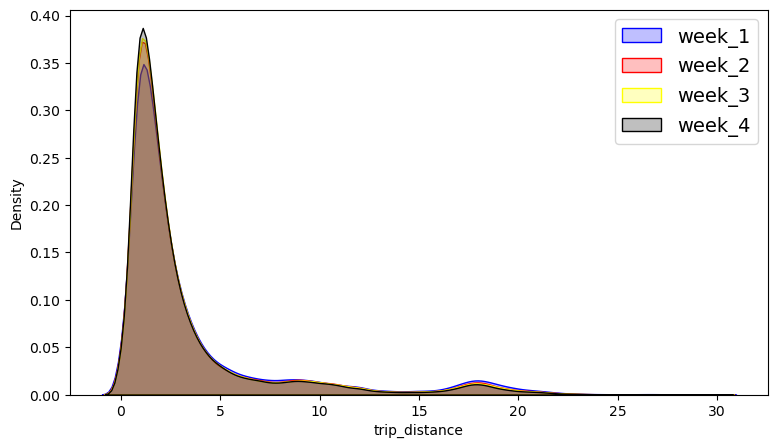

In [14]:
plt.figure(figsize=(9,5))
sns.kdeplot(week_1['trip_distance'],fill=True,color='blue')
sns.kdeplot(week_2['trip_distance'],fill=True,color='red')
sns.kdeplot(week_3['trip_distance'],fill=True,color='yellow')
sns.kdeplot(week_4['trip_distance'],fill=True,color='black')
plt.legend(['week_1','week_2','week_3','week_4'],fontsize=14)
plt.show()

**Хорошо видно, что формы распределений похожи, но есть различия в пиках, это может служить сигналом о том, что распределения могут отличаться.**

***Оценим выборочные характеристики***

In [15]:
print('1 неделя:', '\n','среднее = ',week_1['trip_distance'].mean().round(2), 'медиана = ',week_1['trip_distance'].median(), 'ско =',  week_1['trip_distance'].std(),'\n',
     '2 неделя:', '\n','среднее = ',week_2['trip_distance'].mean().round(2), 'медиана = ',week_2['trip_distance'].median(), 'ско =', week_2['trip_distance'].std(),'\n',
     '3 неделя:', '\n','среднее = ',week_3['trip_distance'].mean().round(2), 'медиана = ',week_3['trip_distance'].median(), 'ско =',week_3['trip_distance'].std(),'\n',
     '4 неделя:', '\n','среднее = ',week_4['trip_distance'].mean().round(2), 'медиана = ',week_4['trip_distance'].median(), 'ско =',week_4['trip_distance'].std(),'\n',)

1 неделя: 
 среднее =  3.61 медиана =  1.85 ско = 4.603588998852219 
 2 неделя: 
 среднее =  3.34 медиана =  1.77 ско = 4.279427686872974 
 3 неделя: 
 среднее =  3.28 медиана =  1.77 ско = 4.199605188069421 
 4 неделя: 
 среднее =  3.15 медиана =  1.71 ско = 4.032150357310187 



**Выборочные характеристики довольно близки, проведем стат. тест чтобы понять верна ли нулевая гипотеза.**

***One-way ANOVA***

$ \mathbb{H_0}$**: средние длин поездок одинаковы.**

In [16]:
sp.stats.f_oneway(week_1['trip_distance'],week_2['trip_distance'],week_3['trip_distance'],week_4['trip_distance'])

F_onewayResult(statistic=1372.2826811342024, pvalue=0.0)

***p-val < $\normalsize \alpha $ => отвергаем гипотезу о равенстве средних у распределений.***

**Теперь оценим распределение в динамике (как оно менялось от недели к неделе) при помощи теста Мана-Уитни.**

In [17]:
print(sp.stats.mannwhitneyu(week_1['trip_distance'], week_2['trip_distance']),'\n',
    sp.stats.mannwhitneyu(week_2['trip_distance'], week_3['trip_distance']),'\n',
    sp.stats.mannwhitneyu(week_3['trip_distance'], week_4['trip_distance']),'\n')

MannwhitneyuResult(statistic=220818588076.0, pvalue=8.555462705898098e-216) 
 MannwhitneyuResult(statistic=244733337211.0, pvalue=0.026774998396886723) 
 MannwhitneyuResult(statistic=255070028971.0, pvalue=1.2950378197703925e-77) 



***В каждом случае p-val < $\normalsize \alpha $ => отвергаем гипотезу о равенстве распределений.***

**Также оценим распределение в динамике (как оно менялось от недели к неделе), но в этот раз при помощи теста Колмогорова-Смирнова.**

In [18]:
print(sp.stats.kstest(week_1['trip_distance'],week_2['trip_distance']),'\n',
    sp.stats.kstest(week_2['trip_distance'],week_3['trip_distance']),'\n',
    sp.stats.kstest(week_3['trip_distance'],week_4['trip_distance']),'\n')

KstestResult(statistic=0.024690235325688925, pvalue=2.322717290278919e-173, statistic_location=2.5, statistic_sign=-1) 
 KstestResult(statistic=0.004840439856058754, pvalue=1.5433230001097772e-07, statistic_location=5.68, statistic_sign=-1) 
 KstestResult(statistic=0.012249425680273707, pvalue=1.4758573111392996e-46, statistic_location=1.35, statistic_sign=-1) 



***Видим такую же картину, в каждом случае p-val < $\normalsize \alpha $ => отвергаем гипотезу о равенстве распределений.***

**Проверим резльтаты теста бутстрапом**

In [19]:
observed_statistic_1_2 = sp.stats.kstest(week_1['trip_distance'],week_2['trip_distance']).statistic
observed_statistic_2_3 = sp.stats.kstest(week_2['trip_distance'],week_3['trip_distance']).statistic
observed_statistic_3_4 = sp.stats.kstest(week_3['trip_distance'],week_4['trip_distance']).statistic

bootstrap_statistics_1_2 = []
bootstrap_statistics_2_3 = []
bootstrap_statistics_3_4 = []

for _ in tqdm(range(1)):
    bootstrap_w1 = np.random.choice(week_1['trip_distance'], size = len(week_1['trip_distance']), replace=True)
    bootstrap_w2 = np.random.choice(week_2['trip_distance'], size = len(week_2['trip_distance']), replace=True)
    bootstrap_w3 = np.random.choice(week_3['trip_distance'], size = len(week_3['trip_distance']), replace=True)
    bootstrap_w4 = np.random.choice(week_4['trip_distance'], size = len(week_4['trip_distance']), replace=True)  
    
    bootstrap_statistic_1_2 = sp.stats.kstest(bootstrap_w1, bootstrap_w2).statistic
    bootstrap_statistic_2_3 = sp.stats.kstest(bootstrap_w2, bootstrap_w3).statistic
    bootstrap_statistic_3_4 = sp.stats.kstest(bootstrap_w3, bootstrap_w4).statistic
    
    bootstrap_statistics_1_2.append(bootstrap_statistic_1_2)
    bootstrap_statistics_2_3.append(bootstrap_statistic_2_3)
    bootstrap_statistics_3_4.append(bootstrap_statistic_3_4)
    bootstrap_statistic_1_2 = 0
    bootstrap_statistic_2_3 = 0
    bootstrap_statistic_3_4 = 0
    
p_value_1_2 = np.mean(np.array(bootstrap_statistic_1_2) >= observed_statistic_1_2)
p_value_2_3 = np.mean(np.array(bootstrap_statistic_2_3) >= observed_statistic_2_3)
p_value_3_4 = np.mean(np.array(bootstrap_statistic_3_4) >= observed_statistic_3_4)

print("Наблюдаемая статистика Колмогорова распределений 1 и 2 недель:", observed_statistic_1_2)
print("p-value:", p_value_1_2)

if p_value_1_2 < 0.05:
    print("Отвергаем нулевую гипотезу - распределения 1 и 2 недель различны.", '\n')
else:
    print("Принимаем нулевую гипотезу - распредения 1 и 2 недель одинаковы.", '\n')

print("Наблюдаемая статистика Колмогорова распределений 2 и 3 недель:", observed_statistic_2_3)
print("p-value:", p_value_2_3)

if p_value_2_3 < 0.05:
    print("Отвергаем нулевую гипотезу - распределения 2 и 3 недель различны.", '\n')
else:
    print("Принимаем нулевую гипотезу - распредения 2 и 3 недель одинаковы.", '\n')
    
print("Наблюдаемая статистика Колмогорова распределений 3 и 4 недель:", observed_statistic_3_4)
print("p-value:", p_value_3_4)

if p_value_3_4 < 0.05:
    print("Отвергаем нулевую гипотезу - распределения 3 и 4 недель различны.", '\n')
else:
    print("Принимаем нулевую гипотезу - распредения 3 и 4 недель одинаковы.", '\n')
    

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.65s/it]

Наблюдаемая статистика Колмогорова распределений 1 и 2 недель: 0.024690235325688925
p-value: 0.0
Отвергаем нулевую гипотезу - распределения 1 и 2 недель различны. 

Наблюдаемая статистика Колмогорова распределений 2 и 3 недель: 0.004840439856058754
p-value: 0.0
Отвергаем нулевую гипотезу - распределения 2 и 3 недель различны. 

Наблюдаемая статистика Колмогорова распределений 3 и 4 недель: 0.012249425680273707
p-value: 0.0
Отвергаем нулевую гипотезу - распределения 3 и 4 недель различны. 



***Результаты бутстрапа совпали с результатами теста.***

**Вычислим индекс PSI для пар распределений, чтобы оценить распределение в динамике.**

In [20]:
def _psi(expected: np.ndarray, actual: np.ndarray, bucket_type: str = "bins", n_bins: int = 10) -> float:

    breakpoints = np.arange(0, n_bins + 1) / (n_bins) * 100
    if bucket_type == "bins":
        breakpoints = np.histogram(expected, n_bins)[1]
    elif bucket_type == "quantiles":
        breakpoints = np.percentile(expected, breakpoints)

    expected_percents = np.histogram(expected, breakpoints)[0] / len(expected)
    actual_percents = np.histogram(actual, breakpoints)[0] / len(actual)
    expected_percents = np.clip(expected_percents, a_min=0.0001, a_max=None)
    actual_percents = np.clip(actual_percents, a_min=0.0001, a_max=None)
    psi_value = (expected_percents - actual_percents) * np.log(expected_percents / actual_percents)
    psi_value = sum(psi_value)

    return psi_value


def calculate_psi(
        expected: np.ndarray, actual: np.ndarray, bucket_type: str = "bins", n_bins: int = 20, axis: int = 0) -> np.ndarray:
    if len(expected.shape) == 1:
        psi_values = np.empty(len(expected.shape))
    else:
        psi_values = np.empty(expected.shape[axis])

    for i in range(0, len(psi_values)):
        if len(psi_values) == 1:
            psi_values = _psi(expected, actual, bucket_type, n_bins)
        elif axis == 0:
            psi_values[i] = _psi(expected[:, i], actual[:, i], bucket_type, n_bins)
        elif axis == 1:
            psi_values[i] = _psi(expected[i, :], actual[i, :], bucket_type, n_bins)
        return np.array(psi_values)

    
print('psi_1_2 =', calculate_psi(week_1['trip_distance'], week_2['trip_distance'], bucket_type="bins", n_bins=10, axis=0))
print('psi_2_3 =', calculate_psi(week_2['trip_distance'], week_3['trip_distance'], bucket_type="bins", n_bins=10, axis=0))
print('psi_3_4 =', calculate_psi(week_3['trip_distance'], week_4['trip_distance'], bucket_type="bins", n_bins=10, axis=0))

psi_1_2 = 0.004251326055432527
psi_2_3 = 0.0002790666520960745
psi_3_4 = 0.0010748608153652135


***Индекс PSI < 0.1, значит нет значимых изменений в выборках.***

**Проверим данные на наличие проблем. (DQ)**

In [125]:
count_list = []
mean_list = []

datetime.date(2023, 1, 8)

for i in tqdm(range(1,30)):
    count_list.append(data[data['start_date'] == datetime.date(2023, 1, i)].count())
    mean_list.append(data[data['start_date'] == datetime.date(2023, 1, i)]['trip_distance'].mean())

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:09<00:00,  3.09it/s]


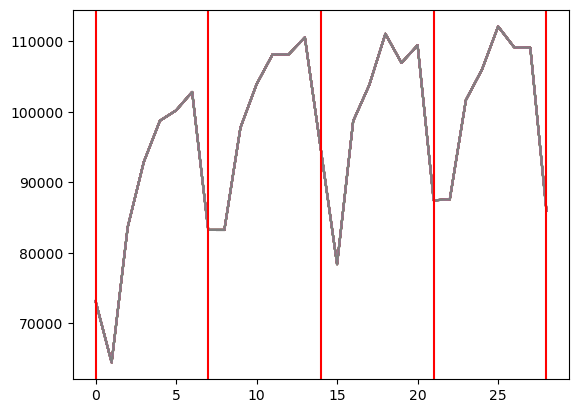

In [126]:
plt.plot(count_list)
plt.axvline(x=0, color = 'r')
plt.axvline(x=7, color = 'r')
plt.axvline(x=14, color = 'r')
plt.axvline(x=21, color = 'r')
plt.axvline(x=28, color = 'r')

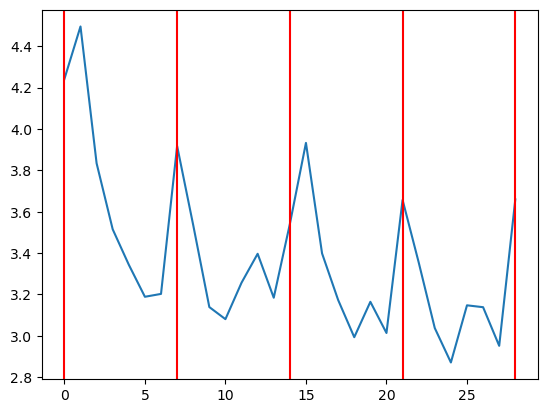

In [127]:
plt.plot(mean_list)
plt.axvline(x=0, color = 'r')
plt.axvline(x=7, color = 'r')
plt.axvline(x=14, color = 'r')
plt.axvline(x=21, color = 'r')
plt.axvline(x=28, color = 'r')

***Проблем с даннымми нет, по характерам графиков можно понять, что нет ни потерь, ни ошибок в данных.***

### Делаем вывод о том, что каждую неделю распределение длин поездок менялось. 
**Скорее всего на это повлияли новогодние праздники, т.к. в первую неделю наблюдалась наибольшая средняя длина поездок.**

*****

### 2. Проверка гипотезы о равенстве распределений числа пассажиров (дискретная метрика).

***Зафиксируем уровень значимости*** 

$\alpha = 0.05$

### $ \mathbb{H_0}$***:  распределения количества числа пассажиров одинаковы.***

**Построим графики плотностей и визуально оценим распределения.**

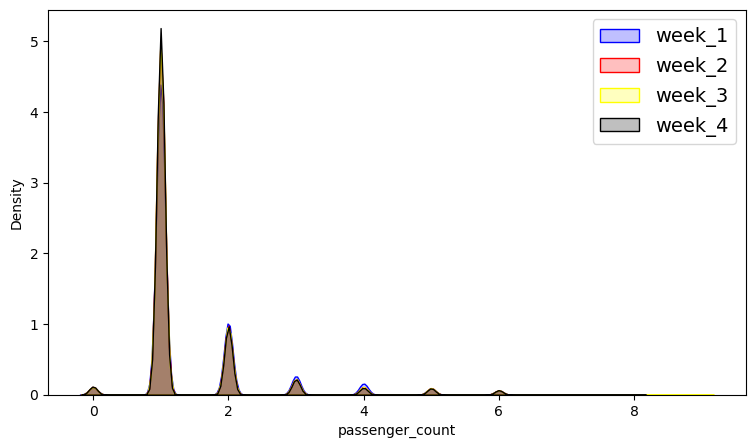

In [21]:
plt.figure(figsize=(9,5))
sns.kdeplot(week_1['passenger_count'],fill=True,color='Blue')
sns.kdeplot(week_2['passenger_count'],fill=True,color='red')
sns.kdeplot(week_3['passenger_count'],fill=True,color='yellow')
sns.kdeplot(week_4['passenger_count'],fill=True,color='black')
plt.legend(['week_1','week_2','week_3','week_4'],fontsize=14)
plt.show()

**Видно, что формы распределений похожи, но есть различия в пиках, как в предыдущем случае. Это может служить сигналом о том, что распределения могут отличаться.**

***Оценим выборочные характеристики***

In [22]:
print('1 неделя:', '\n','среднее = ',week_1['passenger_count'].mean().round(2), 'медиана = ',week_1['passenger_count'].median(), 'ско =',  week_1['passenger_count'].std(),'\n',
     '2 неделя:', '\n','среднее = ',week_2['passenger_count'].mean().round(2), 'медиана = ',week_2['passenger_count'].median(), 'ско =', week_2['passenger_count'].std(),'\n',
     '3 неделя:', '\n','среднее = ',week_3['passenger_count'].mean().round(2), 'медиана = ',week_3['passenger_count'].median(), 'ско =',week_3['passenger_count'].std(),'\n',
     '4 неделя:', '\n','среднее = ',week_4['passenger_count'].mean().round(2), 'медиана = ',week_4['passenger_count'].median(), 'ско =',week_4['passenger_count'].std(),'\n',)

1 неделя: 
 среднее =  1.42 медиана =  1.0 ско = 0.9389389908127853 
 2 неделя: 
 среднее =  1.36 медиана =  1.0 ско = 0.894112753412992 
 3 неделя: 
 среднее =  1.36 медиана =  1.0 ско = 0.8910297011909475 
 4 неделя: 
 среднее =  1.34 медиана =  1.0 ско = 0.8755108576785857 



**Медиана ожидаемо равна у всех недель, т.к. чаще всего люди едут в такси одни.**

**Выборочные характеристики 2 и 3 недель очень близки, возможно распределение пассажиров в эти недели будет одинаковым**

In [23]:
passenger_w1 = [week_1['passenger_count'].value_counts()[1],week_1['passenger_count'].value_counts()[2],week_1['passenger_count'].value_counts()[3],
               week_1['passenger_count'].value_counts()[4],week_1['passenger_count'].value_counts()[5],week_1['passenger_count'].value_counts()[6],]
passenger_w2 = [week_2['passenger_count'].value_counts()[1],week_2['passenger_count'].value_counts()[2],week_2['passenger_count'].value_counts()[3],
               week_2['passenger_count'].value_counts()[4],week_2['passenger_count'].value_counts()[5],week_2['passenger_count'].value_counts()[6],]
passenger_w3 = [week_3['passenger_count'].value_counts()[1],week_3['passenger_count'].value_counts()[2],week_3['passenger_count'].value_counts()[3],
               week_3['passenger_count'].value_counts()[4],week_3['passenger_count'].value_counts()[5],week_3['passenger_count'].value_counts()[6],]
passenger_w4 = [week_4['passenger_count'].value_counts()[1],week_4['passenger_count'].value_counts()[2],week_4['passenger_count'].value_counts()[3],
               week_4['passenger_count'].value_counts()[4],week_4['passenger_count'].value_counts()[5],week_4['passenger_count'].value_counts()[6],]

In [24]:
pass_list = [passenger_w1, passenger_w2, passenger_w3, passenger_w4]

In [25]:
pass_list

[[444840, 103107, 26727, 16036, 9019, 5700],
 [527392, 103426, 23686, 11752, 10084, 6664],
 [533403, 104857, 24245, 11754, 10233, 6545],
 [547842, 102555, 23212, 10425, 9697, 6837]]

***Воспользуемся критерием Пирсона, т.к. он используется для проверки гипотезы о принадлежности независимых выборок одному закону распределения в дискретном случае.***

In [26]:
sp.stats.chi2_contingency(pass_list)

Chi2ContingencyResult(statistic=6456.028930470291, pvalue=0.0, dof=15, expected_freq=array([[463886.90258608,  93511.47536154,  22109.14032935,
         11287.70220534,   8817.67727062,   5816.10224706],
       [523325.79049551, 105493.31419181,  24942.03495622,
         12734.0212594 ,   9947.50639058,   6561.33270648],
       [529480.77066407, 106734.05039966,  25235.38516618,
         12883.789625  ,  10064.50177983,   6638.50236526],
       [536783.53625434, 108206.16004698,  25583.43954825,
         13061.48691026,  10203.31455897,   6730.0626812 ]]))

***p-val < $\normalsize \alpha $ => отвергаем гипотезу о равенстве распределений.***

**Теперь оценим распределение в динамике (как оно менялось от недели к неделе) также при помощи теста Пирсона.**

In [27]:
print('1 и 2 неделя:', sp.stats.chi2_contingency(pass_list[0:2]).pvalue,'\n',
    '2 и 3 неделя:', sp.stats.chi2_contingency(pass_list[1:3]).pvalue,'\n',
    '3 и 4 неделя:', sp.stats.chi2_contingency(pass_list[2:4]).pvalue,'\n')

1 и 2 неделя: 0.0 
 2 и 3 неделя: 0.34554906971350013 
 3 и 4 неделя: 1.431091728745176e-57 



In [28]:
sp.stats.chi2_contingency(pass_list[1:3])

Chi2ContingencyResult(statistic=5.6145444260509025, pvalue=0.34554906971350013, dof=5, expected_freq=array([[527296.65867321, 103532.6617852 ,  23825.39147231,
         11684.28891423,  10099.11077471,   6565.88838033],
       [533498.34132679, 104750.3382148 ,  24105.60852769,
         11821.71108577,  10217.88922529,   6643.11161967]]))

***1 и 2 неделя: p-val < $\normalsize \alpha $ => отвергаем гипотезу о равенстве распределений.***

***2 и 3 неделя: p-val > $\normalsize \alpha $ => принимаем гипотезу о равенстве распределений.***

***3 и 4 неделя: p-val < $\normalsize \alpha $ => отвергаем гипотезу о равенстве распределений.***


  **Как и ожидалось распределения числа пассажиров 2 и 3 недели одианаковы.**

**Проверим резльтаты теста бутстрапом**

In [29]:
observed_statistic_1_2 = sp.stats.chi2_contingency(pass_list[0:2]).statistic
observed_statistic_2_3 = sp.stats.chi2_contingency(pass_list[1:3]).statistic
observed_statistic_3_4 = sp.stats.chi2_contingency(pass_list[2:4]).statistic

bootstrap_statistics_1_2 = []
bootstrap_statistics_2_3 = []
bootstrap_statistics_3_4 = []

for _ in tqdm(range(1)):
    bootstrap_w1 = np.random.choice(passenger_w1, size = len(passenger_w1), replace=True)
    bootstrap_w2 = np.random.choice(passenger_w2, size = len(passenger_w2), replace=True)
    bootstrap_w3 = np.random.choice(passenger_w3, size = len(passenger_w3), replace=True)
    bootstrap_w4 = np.random.choice(passenger_w4, size = len(passenger_w4), replace=True)
    
    bootstrap_statistic_1_2 = sp.stats.chi2_contingency(bootstrap_w1, bootstrap_w2).statistic
    bootstrap_statistic_2_3 = sp.stats.chi2_contingency(bootstrap_w2, bootstrap_w3).statistic
    bootstrap_statistic_3_4 = sp.stats.chi2_contingency(bootstrap_w3, bootstrap_w4).statistic
    
    bootstrap_statistics_1_2.append(bootstrap_statistic_1_2)
    bootstrap_statistics_2_3.append(bootstrap_statistic_2_3)
    bootstrap_statistics_3_4.append(bootstrap_statistic_3_4)
    bootstrap_statistic_1_2 = 0
    bootstrap_statistic_2_3 = 0
    bootstrap_statistic_3_4 = 0
    
p_value_1_2 = np.mean(np.array(bootstrap_statistic_1_2) >= observed_statistic_1_2)
p_value_2_3 = np.mean(np.array(bootstrap_statistic_2_3) >= observed_statistic_2_3)
p_value_3_4 = np.mean(np.array(bootstrap_statistic_3_4) >= observed_statistic_3_4)

print("Наблюдаемая статистика Хи-квадрат распределений 1 и 2 недель:", observed_statistic_1_2)
print("p-value:", p_value_1_2)

if p_value_1_2 < 0.05:
    print("Отвергаем нулевую гипотезу - распределения 1 и 2 недель различны.", '\n')
else:
    print("Принимаем нулевую гипотезу - распредения 1 и 2 недель одинаковы.", '\n')

print("Наблюдаемая статистика Хи-квадрат распределений 2 и 3 недель:", observed_statistic_2_3)
print("p-value:", p_value_2_3)

if p_value_2_3 < 0.05:
    print("Отвергаем нулевую гипотезу - распределения 2 и 3 недель различны.", '\n')
else:
    print("Принимаем нулевую гипотезу - распредения 2 и 3 недель одинаковы.", '\n')
    
print("Наблюдаемая статистика Хи-квадрат распределений 3 и 4 недель:", observed_statistic_3_4)
print("p-value:", p_value_3_4)

if p_value_3_4 < 0.05:
    print("Отвергаем нулевую гипотезу - распределения 3 и 4 недель различны.")
else:
    print("Принимаем нулевую гипотезу - распредения 3 и 4 недель одинаковы.")
    

100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 334.05it/s]

Наблюдаемая статистика Хи-квадрат распределений 1 и 2 недель: 3329.7643874603955
p-value: 0.0
Отвергаем нулевую гипотезу - распределения 1 и 2 недель различны. 

Наблюдаемая статистика Хи-квадрат распределений 2 и 3 недель: 5.6145444260509025
p-value: 0.0
Отвергаем нулевую гипотезу - распределения 2 и 3 недель различны. 

Наблюдаемая статистика Хи-квадрат распределений 3 и 4 недель: 276.01205021809574
p-value: 0.0
Отвергаем нулевую гипотезу - распределения 3 и 4 недель различны.


**Результаты бутстрапа совпали с результатами теста.**

**Вычислим индекс PSI для пар распределений, чтобы оценить распределение в динамике.**

In [30]:
def _psi(expected: np.ndarray, actual: np.ndarray, bucket_type: str = "bins", n_bins: int = 10) -> float:

    breakpoints = np.arange(0, n_bins + 1) / (n_bins) * 100
    if bucket_type == "bins":
        breakpoints = np.histogram(expected, n_bins)[1]
    elif bucket_type == "quantiles":
        breakpoints = np.percentile(expected, breakpoints)

    expected_percents = np.histogram(expected, breakpoints)[0] / len(expected)
    actual_percents = np.histogram(actual, breakpoints)[0] / len(actual)
    expected_percents = np.clip(expected_percents, a_min=0.0001, a_max=None)
    actual_percents = np.clip(actual_percents, a_min=0.0001, a_max=None)
    psi_value = (expected_percents - actual_percents) * np.log(expected_percents / actual_percents)
    psi_value = sum(psi_value)

    return psi_value


def calculate_psi(
        expected: np.ndarray, actual: np.ndarray, bucket_type: str = "bins", n_bins: int = 20, axis: int = 0) -> np.ndarray:
    if len(expected.shape) == 1:
        psi_values = np.empty(len(expected.shape))
    else:
        psi_values = np.empty(expected.shape[axis])

    for i in range(0, len(psi_values)):
        if len(psi_values) == 1:
            psi_values = _psi(expected, actual, bucket_type, n_bins)
        elif axis == 0:
            psi_values[i] = _psi(expected[:, i], actual[:, i], bucket_type, n_bins)
        elif axis == 1:
            psi_values[i] = _psi(expected[i, :], actual[i, :], bucket_type, n_bins)
        return np.array(psi_values)

    
print('psi_1_2 =', calculate_psi(week_1['passenger_count'], week_2['passenger_count'], bucket_type="bins", n_bins=10, axis=0))
print('psi_2_3 =', calculate_psi(week_2['passenger_count'], week_3['passenger_count'], bucket_type="bins", n_bins=10, axis=0))
print('psi_3_4 =', calculate_psi(week_3['passenger_count'], week_4['passenger_count'], bucket_type="bins", n_bins=10, axis=0))

psi_1_2 = 0.010199354333122218
psi_2_3 = 2.9435162255096117e-05
psi_3_4 = 0.0008068728739968903


***Индекс PSI < 0.1, значит нет значимых изменений в выборках.***

**Проверим данные на наличие проблем. (DQ)**

In [128]:
count_list = []
mean_list = []

datetime.date(2023, 1, 8)

for i in tqdm(range(1,30)):
    count_list.append(data[data['start_date'] == datetime.date(2023, 1, i)].count())
    mean_list.append(data[data['start_date'] == datetime.date(2023, 1, i)]['passenger_count'].mean())

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:09<00:00,  3.12it/s]


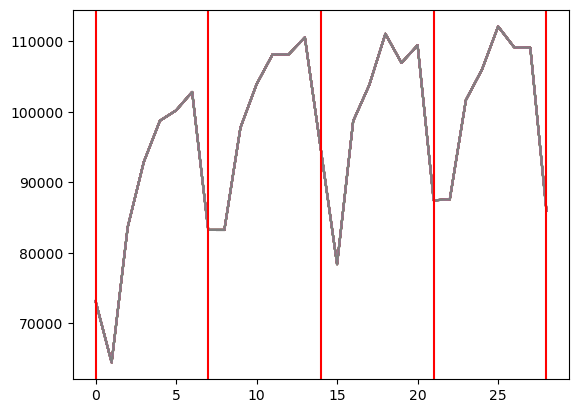

In [131]:
plt.plot(count_list)
plt.axvline(x=0, color = 'r')
plt.axvline(x=7, color = 'r')
plt.axvline(x=14, color = 'r')
plt.axvline(x=21, color = 'r')
plt.axvline(x=28, color = 'r')

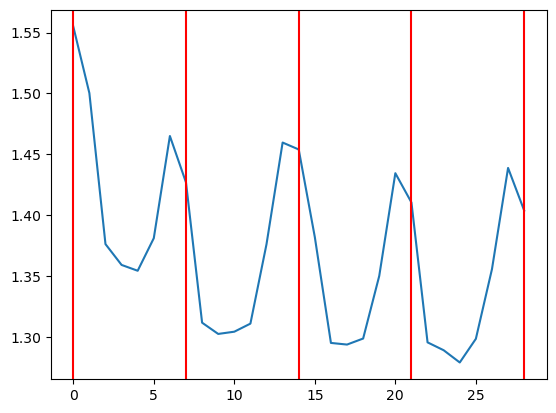

In [130]:
plt.plot(mean_list)
plt.axvline(x=0, color = 'r')
plt.axvline(x=7, color = 'r')
plt.axvline(x=14, color = 'r')
plt.axvline(x=21, color = 'r')
plt.axvline(x=28, color = 'r')

***Проблем с даннымми нет, по характерам графиков можно понять, что нет ни потерь, ни ошибок в данных.***

## Вывод: Распределения метрик менялись каждую неделю. Спрос на поездки в такси падал в течение месяца.